In [1]:
fitSS <- function(xy,
                  a0=mean(xy[,1]),
                  b0=mean(xy[,2]),
                  r0 = mean(sqrt((xy[,1]-a0)^2 + (xy[,2]-b0)^2)),
                  ...){
    SS <- function(abr){
        sum((abr[3] - sqrt((xy[,1]-abr[1])^2 + (xy[,2]-abr[2])^2))^2)
    }
    optim(c(a0,b0,r0), SS, ...)
}

In [3]:
circlexy <- function(xyr, n=180){
    theta = seq(0,2*pi,len=n)
    cbind(xyr[1] + xyr[3]*cos(theta),
          xyr[2] + xyr[3]*sin(theta)
          )
}
sim_circles <- function(n,x=0,y=0,r=1,sd=0.05){
    theta = runif(n, 0, 2*pi)
    r = r + rnorm(n, mean=0, sd=sd)
    cbind(x + r*cos(theta),
          y + r*sin(theta)
      )
}

In [12]:
x <- c(3.22384807e+03   ,1.13395936e+04   ,1.41178829e+04  , 1.37967085e+04
   , 9.97792811e+03  , 7.42129040e+03  , 4.45331416e+03  , 1.27648976e+03
  , -1.96361736e+03 , -5.10685009e+03 , -1.43302420e+04 , -1.41288322e+04
  , -1.13331881e+04 , -3.22527933e+03)
y <- c(1.41247636e+04 ,  9.04320918e+03  , 3.22253685e+03 , -4.32256859e+03
   ,-1.04657800e+04,  -1.24044941e+04 , -1.37729306e+04  ,-1.44135864e+04
   ,-1.43422029e+04 , -1.35484879e+04 , -2.09796431e+03 ,  3.22399837e+03
   , 9.03680652e+03 ,  1.41264884e+04)
xy1=cbind(x,y)
print(xy1)

               x          y
 [1,]   3223.848  14124.764
 [2,]  11339.594   9043.209
 [3,]  14117.883   3222.537
 [4,]  13796.709  -4322.569
 [5,]   9977.928 -10465.780
 [6,]   7421.290 -12404.494
 [7,]   4453.314 -13772.931
 [8,]   1276.490 -14413.586
 [9,]  -1963.617 -14342.203
[10,]  -5106.850 -13548.488
[11,] -14330.242  -2097.964
[12,] -14128.832   3223.998
[13,] -11333.188   9036.807
[14,]  -3225.279  14126.488


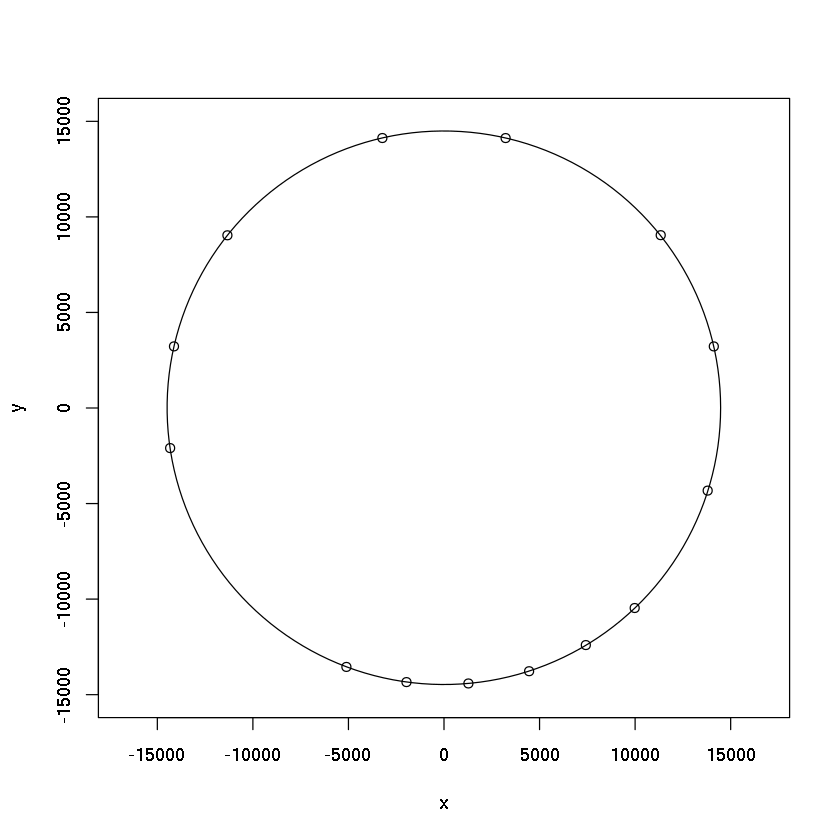

In [13]:
f1 = fitSS(xy1)
plot(xy1,asp=1,xlim=c(-15000,15000),ylim=c(-15000,15000))
lines(circlexy(f1$par))

In [36]:
r=f1$par
R=14600.0
#print(r[1]*3)
y1=r[2]+sqrt(r[3]*r[3]-r[1]*r[1])
y2=r[2]-sqrt(r[3]*r[3]-r[1]*r[1])
x1=r[1]+sqrt(r[3]*r[3]-r[2]*r[2])
x2=r[1]-sqrt(r[3]*r[3]-r[2]*r[2])
#print(y2,y1,x1,x2)
print(R-y1)
print(R+y2)
print(R+x2)
print(R-x1)

[1] 104.9036
[1] 131.4362
[1] 110.8936
[1] 125.4546


In [ ]:
print(f1$par[3])

In [6]:
xy = sim_circles(10)
print(xy)
f = fitSS(xy)

             [,1]       [,2]
 [1,]  0.83691650 -0.4526299
 [2,]  0.34650129  1.0004622
 [3,]  0.52061046  0.8530600
 [4,]  0.95715074  0.2637246
 [5,] -0.49887503  0.8891370
 [6,] -0.02997307 -0.9420521
 [7,] -0.39137010 -0.9066057
 [8,]  0.14920664 -0.9545768
 [9,] -0.45246849  0.9859295
[10,] -0.76363926 -0.7536252


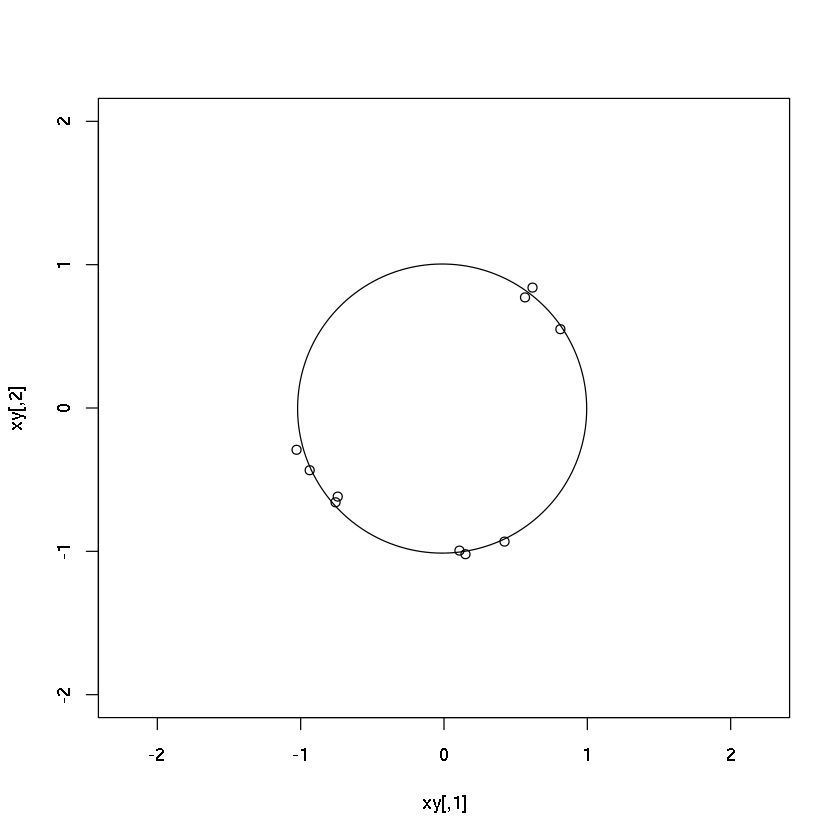

In [5]:
plot(xy,asp=1,xlim=c(-2,2),ylim=c(-2,2))
lines(circlexy(f$par))